### Student Name: Vipul Popat
### Student ID: 18195121

In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

In [4]:
X_orig = np.copy(X)

In [5]:
# Add bias=1 column
X = np.insert(X, 0, 1, axis=1)
X

array([[ 1.        , -0.81510701,  0.12301276],
       [ 1.        ,  0.66648569,  0.40705249],
       [ 1.        , -0.29989383,  0.66644882],
       ...,
       [ 1.        ,  1.00159599, -0.10198836],
       [ 1.        ,  0.61910771,  0.48379813],
       [ 1.        , -0.76099607, -0.59558335]])

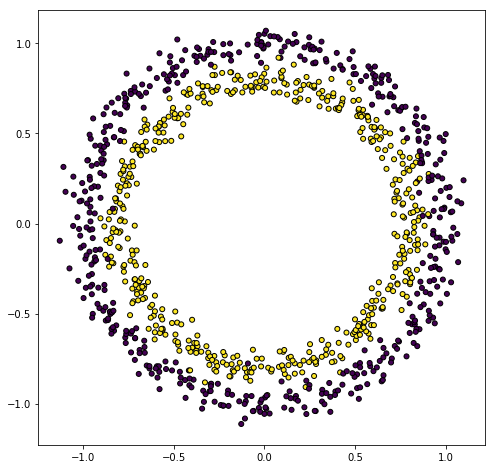

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 1], X[:, 2], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [7]:
print(X.shape)

(1000, 3)


In [8]:
class LearningAlgorithm(object):
    """ Perceptron Classifier

    Parameters
    ------------
    rate : float
        Learning rate (ranging from 0.0 to 1.0)
    number_of_iteration : int
        Number of iterations over the input dataset.

    Attributes:
    ------------

    coef_ : 1d-array
        Weights after fitting.

    errors_list : list
        Number of misclassification in every epoch(one full training cycle on the training set)

    """

    def fit(self, X, y):

        self.coef_ = np.zeros(X.shape[1])
        pseudo_inv_matrix = np.linalg.pinv(X)
        print(self.coef_.shape)
        print(pseudo_inv_matrix.shape)
        print(y.shape)
        self.coef_ = pseudo_inv_matrix.dot(y)

    def dot_product(self, X):
        """ Calculate the dot product """
        return (np.dot(X, np.transpose(self.coef_)))

    def predictClass(self, X):
        """ Predicting the label for the input data """
        return np.sign(self.dot_product(X)) 
    

    def predict(self, X):
        """ Predicting the label for the input data """
        return self.dot_product(X)
    
def plot_data_and_algorithm(X, y, alg):
    minx = np.amin(X)
    maxx = np.amax(X)
    horz = [minx, maxx]
    vert = alg.predict(X)

    plt.scatter(X[:, 1], X[:, 2], marker='o', c=y,
                s=25, edgecolor='k')
    plt.plot(horz, decision_boundary_lin(alg.coef_, minx, maxx), color='blue')  
    
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2] 


In [9]:
p = LearningAlgorithm()
p.fit(X, np.array(y))
test_x = [[1, -0.75028319, -0.57692659],[1, 0.75028319, 0.57692659]]
print("Predicting the output of [-0.75028319, -0.57692659] = {}".format(p.predictClass(np.array(test_x))))
print("Weight matrix = ", p.coef_)


(3,)
(3, 1000)
(1000,)
Predicting the output of [-0.75028319, -0.57692659] = [-1.  1.]
Weight matrix =  [-5.00239607e-06  4.14513435e-03 -2.38362004e-03]


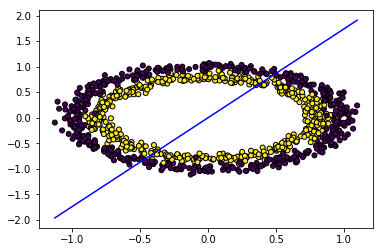

In [10]:
plot_data_and_algorithm(X, y, p)

### Conclusions
- As seen from the scatter plot above, the data points are not linearly separable. Hence a LinearClassification alogorithm is going to perform very badly in this case.
- The error_list indicates above that only the alogorithm has a very high error rate i.e. 1 out of 2 samples are wrong classified which was expected in any case

### Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!

Lets increase the dimension by squaring the data points. This would lead to linearly separable data and then the performance of the alorithm would be on expected lines

(3,)
(3, 1000)
(1000,)
Weight matrix =  [-5.00239607e-06  4.14513435e-03 -2.38362004e-03]


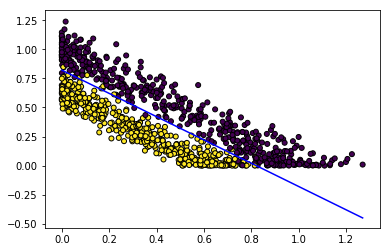

In [11]:
X_square = np.square(X_orig)

# Add bias=1 column
X_square = np.insert(X_square, 0, 1, axis=1)

p_square = LearningAlgorithm()
p_square.fit(X_square, np.array(y))
print("Weight matrix = ", p.coef_)
plot_data_and_algorithm(X_square, y, p_square)


In [12]:
y_square_out = p_square.predict(X_square)

As expected the algorithm works correctly as expected on the linearly separable data

In [13]:
mean_sq_error = mean_squared_error(y, y_square_out)
rmse = np.sqrt(mean_sq_error)
print ("RMSE - SQUARE the DATA POINTS - In House Linear Classification:", rmse)

RMSE - SQUARE the DATA POINTS - In House Linear Classification: 0.45825862212775764


### Also, use scikit-learn’s Linear classification algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.

In [14]:
model_linear = LinearRegression(fit_intercept=False)
model_linear.fit(X_square , np.array(y))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

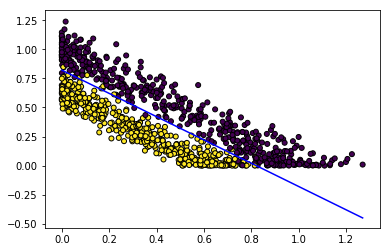

In [15]:
plot_data_and_algorithm(X_square, y, model_linear)

In [16]:
y_square_out = model_linear.predict(X_square)
mse = mean_squared_error(y, y_square_out)
rmse = np.sqrt(mse)
print ("RMSE - SQUARE the DATA POINTS - SKlearn Linear Regression:", rmse)

RMSE - SQUARE the DATA POINTS - SKlearn Linear Regression: 0.45825862212775764


### Logistic Regression

In [17]:
model_logistic = LogisticRegression(solver='lbfgs')
model_logistic.fit(X_square,y)
Y_pred = model_logistic.predict(X_square)

In [18]:
# Calculating RMSE
mse = mean_squared_error(y, Y_pred)
rmse = np.sqrt(mse)

In [19]:
print("RMSE:", rmse)

RMSE: 0.30983866769659335
